In [62]:
# Alumna: Romero Jiménez Sofía Cristal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from math import comb

In [63]:
# Parámetros de la distribución binomial
n = 10   # Número de visitantes diarios
p = 0.30 # Probabilidad de que un visitante realice una compra

# Generar un número aleatorio uniforme U ~ Uniform(0, 1)
num_simulaciones = 100  # Número de simulaciones (días)
U = np.random.uniform(0, 1, num_simulaciones)

# Función de distribución acumulada de la distribución binomial
def binomial_pmf(n, k, p):
    return comb(n, k) * (p**k) * ((1 - p)**(n - k))

def binomial_inverse_transform(n, p, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += binomial_pmf(n, k, p)  # Sumamos la probabilidad hasta que F(k) >= U
        if U <= F_k:
            return k  # Este valor de k es el número de clientes que hicieron una compra
        k += 1

# Generar la cantidad de clientes que realizaron una compra en cada simulación (día)
compras_simuladas = [binomial_inverse_transform(n, p, u) for u in U]

# Mostrar resultados
print("Número de clientes que realizaron una compra en cada simulación (día):")
print(compras_simuladas)

Número de clientes que realizaron una compra en cada simulación (día):
[6, 0, 4, 3, 2, 5, 5, 3, 4, 2, 4, 3, 3, 3, 1, 5, 1, 6, 3, 2, 2, 4, 2, 1, 0, 2, 1, 2, 2, 3, 4, 4, 4, 5, 3, 5, 6, 1, 4, 3, 4, 4, 4, 4, 2, 4, 4, 1, 1, 4, 4, 2, 3, 3, 2, 3, 2, 3, 4, 6, 2, 2, 1, 2, 3, 1, 3, 5, 7, 2, 5, 4, 2, 2, 3, 2, 3, 5, 1, 2, 4, 4, 1, 3, 1, 1, 5, 4, 4, 5, 5, 3, 2, 1, 3, 5, 5, 2, 4, 3]


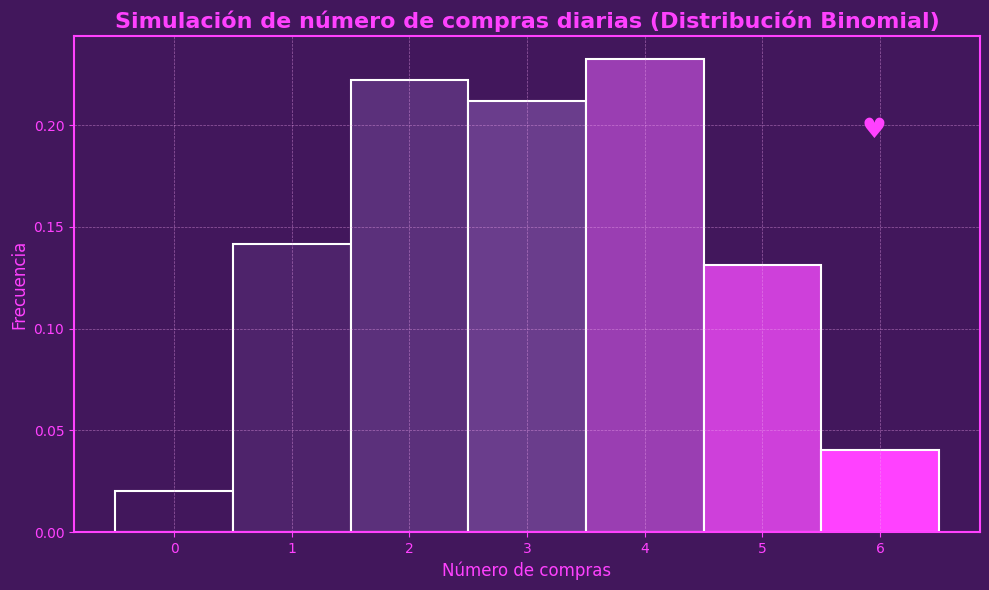

In [64]:
# Diseño de la gráfica
plt.figure(figsize=(10, 6))

purpura_oscuro = '#42175C'
purpura_medio = '#683D8B'
rosa_brillante = '#FF41FF'
rosa_claro = '#F5A9F2'
blanco = '#FFFFFF'

# Colormap personalizado
colors = [purpura_oscuro, purpura_medio, rosa_brillante]
cmap = LinearSegmentedColormap.from_list("custom_purple", colors, N=100)

# Histograma
n, bins, patches = plt.hist(compras_simuladas,
                           bins=np.arange(min(compras_simuladas), max(compras_simuladas) + 1) - 0.5,
                           edgecolor=blanco,
                           linewidth=1.5,
                           density=True)

# Barras
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col) if max(col) > 0 else 1
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))

# Titulos
plt.title("Simulación de número de compras diarias (Distribución Binomial)",
          fontsize=16, color=rosa_brillante, fontweight='bold')
plt.xlabel("Número de compras", fontsize=12, color=rosa_brillante)
plt.ylabel("Frecuencia", fontsize=12, color=rosa_brillante)

# Ejes
plt.tick_params(colors=rosa_brillante)
for spine in plt.gca().spines.values():
    spine.set_edgecolor(rosa_brillante)
    spine.set_linewidth(1.5)

# Cuadricula
plt.grid(True, linestyle='--', linewidth=0.5, color=rosa_claro, alpha=0.5)

# Fondo
plt.gca().set_facecolor(purpura_oscuro)
plt.gcf().set_facecolor(purpura_oscuro)

heart_x = max(compras_simuladas) * 0.85
heart_y = max(n) * 0.85
plt.annotate('♥', xy=(heart_x, heart_y), xytext=(0, 0),
             textcoords='offset points', color=rosa_brillante,
             fontsize=20, ha='center', va='center')

plt.tight_layout()
plt.show()